# Practica *Million de Registros*

- $2120019$ $Reza$ $Campos$ $Fernando$ $Bryan$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

# Read the data
df = pd.read_csv('million.csv')

Describir los rasgos más generales de los datos.

In [2]:
df.head()

,Nombre,Numero,Promedio,Semestre,Materias
0,Jemima Berry,848-261-6134,7.0,5,7
1,Fritz Gardner,584-763-4957,6.6,5,2
2,Kevin Todd,183-377-3727,7.0,6,10
3,Rhiannon Kline,748-620-0328,6.8,7,3
4,Joan Monroe,895-282-3983,8.2,4,8


In [3]:
df.describe()  # get summary of data

,Promedio,Semestre,Materias
count,1000000.000000,1000000.000000,1000000.000000
mean,7.999384,4.003372,6.000159
std,1.155638,1.999453,2.580635
min,6.000000,1.000000,2.000000
25%,7.000000,2.000000,4.000000
50%,8.000000,4.000000,6.000000
75%,9.000000,6.000000,8.000000
max,10.000000,7.000000,10.000000


In [4]:
df.info()  # get info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Nombre    1000000 non-null  object 
 1   Numero    1000000 non-null  object 
 2   Promedio  1000000 non-null  float64
 3   Semestre  1000000 non-null  int64  
 4   Materias  1000000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 38.1+ MB


## Promedio de los datos

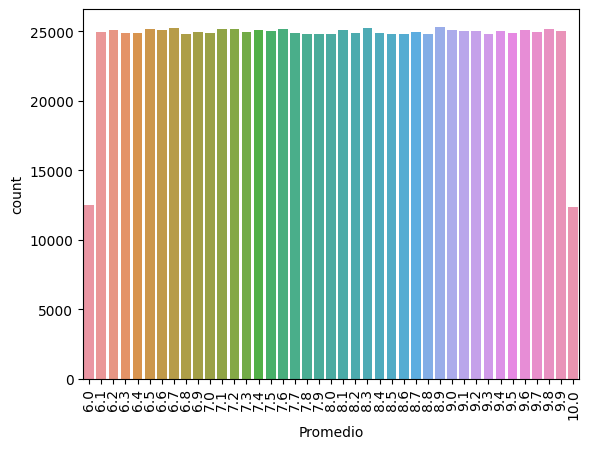

In [5]:
sns.countplot(data=df, x='Promedio')
plt.xticks(rotation=90)
plt.show()

Como se puede observar en la gráfica, la **distribución de los datos es uniforme**, por lo que se puede decir que **los datos son homogéneos**.

Esto nos indica que todos los promedios similares tienen la misma probabilidad de ocurrir, a excepción de los extremos, que tienen una probabilidad menor al resto. 

## Promedio de datos (por Semestre)

             count      mean       std  min  25%  50%  75%   max
Semestre                                                        
1         142562.0  7.996721  1.156100  6.0  7.0  8.0  9.0  10.0
2         142356.0  8.003459  1.156543  6.0  7.0  8.0  9.0  10.0
3         142666.0  7.997834  1.155316  6.0  7.0  8.0  9.0  10.0
4         143006.0  7.999620  1.156607  6.0  7.0  8.0  9.0  10.0
5         143476.0  7.998207  1.156440  6.0  7.0  8.0  9.0  10.0
6         142842.0  8.000529  1.154193  6.0  7.0  8.0  9.0  10.0
7         143092.0  7.999327  1.154279  6.0  7.0  8.0  9.0  10.0


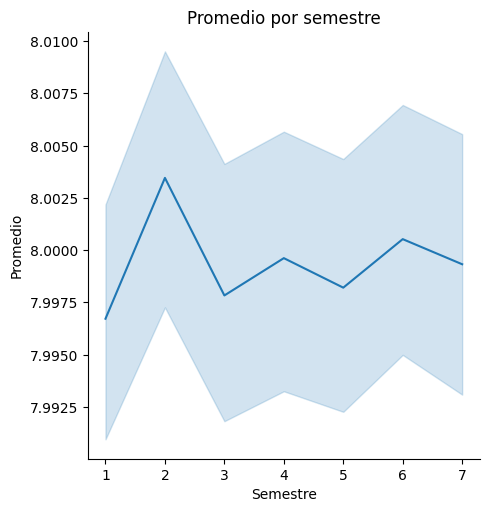

In [6]:
print(df.groupby('Semestre')['Promedio'].describe())

sns.relplot(data=df, kind='line', x='Semestre', y='Promedio')
plt.title('Promedio por semestre')
plt.show()

Al observar el promedio de los alumnos a lo largo de los semestres, se puede observar que **los alumnos tienden a mejorar su promedio** durante su segundo semestre, y que **el promedio tiende a estabilizarse** a partir del cuarto semestre.

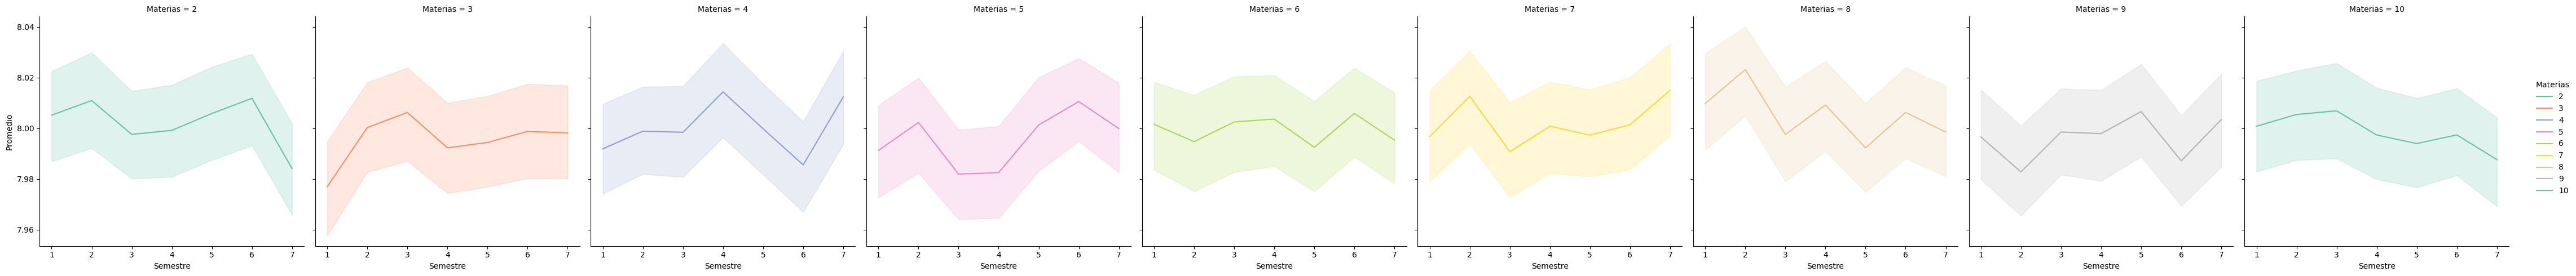

In [7]:
# make this same plot but separate it by Materias
sns.relplot(data=df, kind='line', x='Semestre', y='Promedio', hue='Materias', palette='Set2', col='Materias')
plt.show()

Al observar la gráfica podemos ver que los alumnos que llevan: 
- 2, 8 y 10 materias tienden a **empeorar su promedio**
- 3, 4, 7 y 9 materias tienden a **mejorar su promedio**
- 5 y 6 materias tienden a **mantener su promedio**

Lo que nos puede decir que debe haber un balance entre el número de materias que se llevan y el promedio que se quiere obtener.

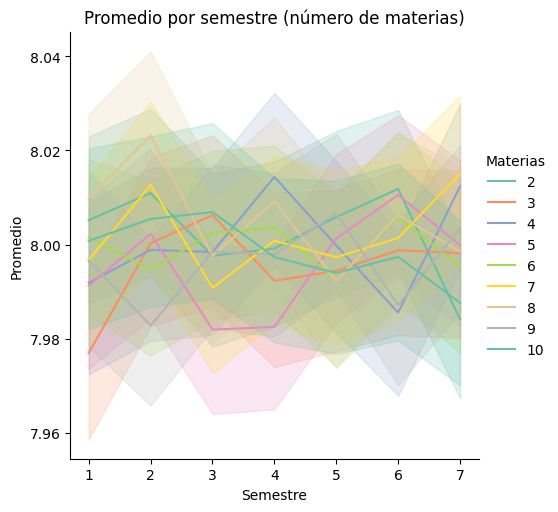

In [8]:
sns.relplot(data=df, kind='line', x='Semestre', y='Promedio', hue='Materias', palette='Set2')
plt.title('Promedio por semestre (número de materias)')
plt.show()

Al separar el promedio por semestre en la cantidad de materias que lleva el alumno, se puede observar que sin importar el numero de materias, el promedio de los alumnos es muy similar durante todos los semestres.
Por lo tanto, podemos decir que **el numero de materias que lleva el alumno no afecta su promedio**.

<Axes: xlabel='Semestre', ylabel='count'>

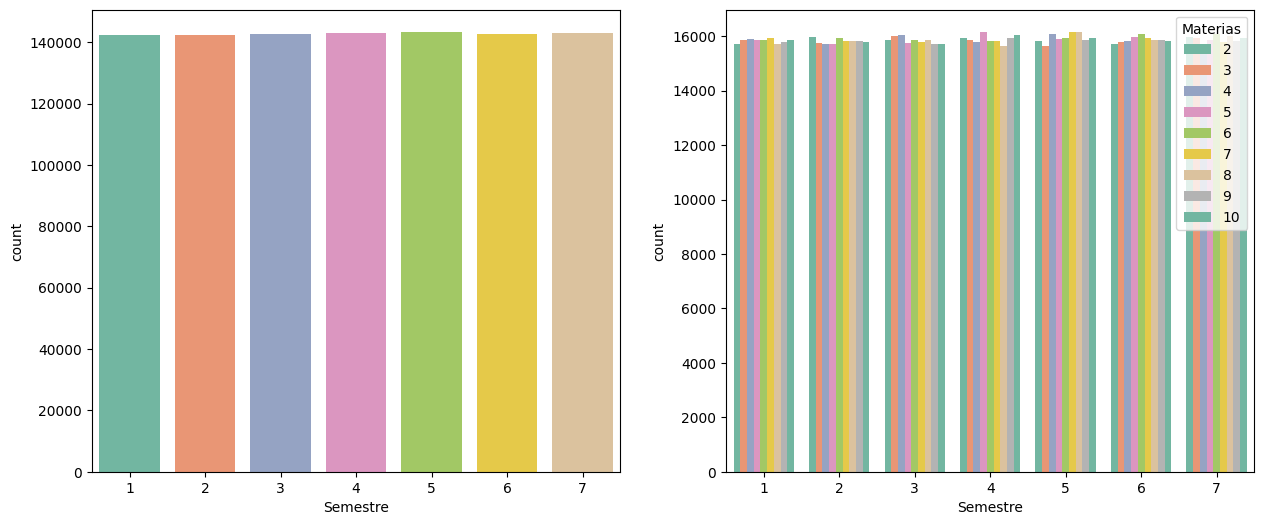

In [9]:
# count the total of students that take n number of classes on each semester
# Count the number of "Materias" for each "Semestre"
df.groupby('Semestre').describe()

# sns.countplot(data=df, x='Semestre', palette='Set2')
# sns.countplot(data=df, x='Semestre', hue='Materias', palette='Set2')

# add this plots to a same figure
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(data=df, x='Semestre', palette='Set2', ax=ax[0])
sns.countplot(data=df, x='Semestre', hue='Materias', palette='Set2', ax=ax[1])

Como se puede observar, hay una cantidad similar de alumnos en todos los semestres, por lo que se puede decir que **los datos son homogéneos**. Dando un aproximado de poco menos de 16000 alumnos por semestre.

También podemos observar que realmente el numero de materias tampoco varía mucho, por lo que podemos decir que **los datos son homogéneos**. Al haber observado la columna de numero de Materias, podemos decir que esta variable realmente no aporta información relevante, por lo que se puede descartar.

In [10]:
# Count the number of "Materias" for each "Semestre"
df.groupby('Materias')['Promedio'].describe()

,count,mean,std,min,25%,50%,75%,max
Materias,,,,,,,,
2,111019.0,8.002058,1.155156,6.0,7.0,8.0,9.0,10.0
3,110835.0,7.995315,1.153529,6.0,7.0,8.0,9.0,10.0
4,111095.0,8.000145,1.155290,6.0,7.0,8.0,9.0,10.0
5,111236.0,7.995646,1.156637,6.0,7.0,8.0,9.0,10.0
6,111618.0,7.999438,1.158044,6.0,7.0,8.0,9.0,10.0
7,111215.0,8.002064,1.156700,6.0,7.0,8.0,9.0,10.0
8,111074.0,8.005180,1.158639,6.0,7.0,8.0,9.0,10.0
9,110829.0,7.996130,1.153039,6.0,7.0,8.0,9.0,10.0
10,111079.0,7.998461,1.153673,6.0,7.0,8.0,9.0,10.0


## [Regresion Lógistica](https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica)

Sigmoide o función logística $$ \sigma(x) = \frac{1}{1+e^{-x}} $$


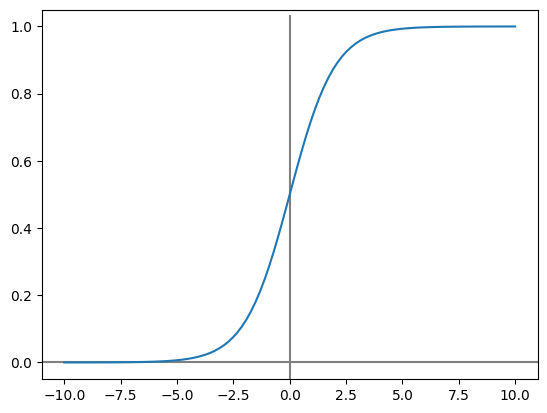

In [11]:
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))
sns.lineplot(x=x, y=y)
plt.scatter(0, 0, s=250000, color='gray')

### K-Means

El algoritmo de K-Means es un algoritmo de aprendizaje no supervisado, que agrupa los datos en K grupos distintos, donde cada grupo tiene un centroide que representa el centro del grupo.

In [12]:
df_norm = df.copy()  # Normalize the data
df_norm.drop(['Nombre', 'Numero'], axis=1, inplace=True)

# diference / range
df_norm['Promedio'] = (df_norm['Promedio'] - df_norm['Promedio'].min()) / (df_norm['Promedio'].max() - df_norm['Promedio'].min())
df_norm['Materias'] = (df_norm['Materias'] - df_norm['Materias'].min()) / (df_norm['Materias'].max() - df_norm['Materias'].min())
df_norm['Semestre'] = (df_norm['Semestre'] - df_norm['Semestre'].min()) / (df_norm['Semestre'].max() - df_norm['Semestre'].min())

df_norm.head()

,Promedio,Semestre,Materias
0,0.25,0.666667,0.625
1,0.15,0.666667,0.000
2,0.25,0.833333,1.000
3,0.20,1.000000,0.125
4,0.55,0.500000,0.750


In [13]:
df_norm.describe()  # See if the data is normalized

,Promedio,Semestre,Materias
count,1000000.000000,1000000.000000,1000000.000000
mean,0.499846,0.500562,0.500020
std,0.288910,0.333242,0.322579
min,0.000000,0.000000,0.000000
25%,0.250000,0.166667,0.250000
50%,0.500000,0.500000,0.500000
75%,0.750000,0.833333,0.750000
max,1.000000,1.000000,1.000000


Una vez normalizados los datos, se puede observar que los datos se agrupan en 3 grupos distintos, por lo que se puede decir que **los datos son homogéneos**.

In [14]:
def elbow_method(df: pd.DataFrame, k: int):
    '''
    Elbow method to find the optimal number of clusters
    Uses the Within Cluster Sum of Squares (WCSS) to find the optimal number of clusters
    Also known as the "Jambu method"

    ### Parameters:
    - df: DataFrame with the data
    - k: Maximum number of clusters to test
    '''
    wcss = []  # Within Cluster Sum of Squares

    for k in range(1, k):  # for each k
        kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)  # create a kmeans object
        kmeans.fit(df)  # fit the data
        wcss.append(kmeans.inertia_)  # get the sum of squared distances

    sns.lineplot(x=range(1, 11), y=wcss)  # plot the sum of squared distances for each k
    plt.xlabel('Number of clusters (k)')  # label the x axis
    plt.ylabel('Sum of squared distances')  # label the y axis
    plt.title('WCSS for each k (Jambu method)')  # title the plot
    plt.grid(True)
    plt.show()  # show the plot

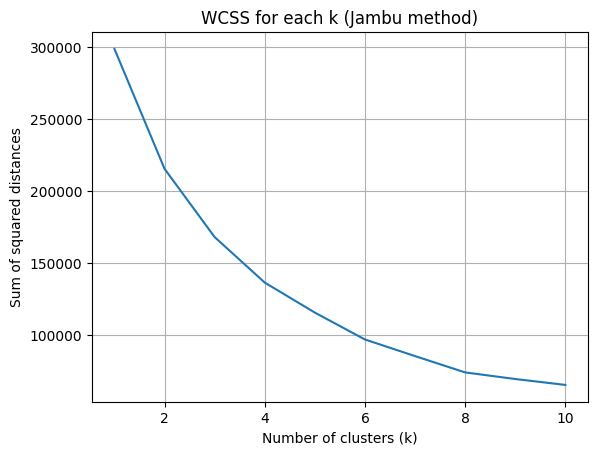

In [15]:
elbow_method(df_norm, 11)  # call the elbow method function

En este gráfico se observa que la disminución de la función de costo se hace más lenta a partir de 3 clusters. Lo que nos permite observar que el numero correcto de clusters es 3, es el gráfico de codo.

In [16]:
number_clusters: int = 3  # set the number of clusters

clustering: KMeans = KMeans(n_clusters=number_clusters, n_init=10, max_iter=300)  # create a kmeans object
clustering.fit(df_norm)  # fit the data to the model

df['KMeans_Clusters'] = clustering.labels_  # add the cluster labels to the dataframe
df.head(10)  # show the dataframe

,Nombre,Numero,Promedio,Semestre,Materias,KMeans_Clusters
0,Jemima Berry,848-261-6134,7.0,5,7,1
1,Fritz Gardner,584-763-4957,6.6,5,2,0
2,Kevin Todd,183-377-3727,7.0,6,10,1
3,Rhiannon Kline,748-620-0328,6.8,7,3,1
4,Joan Monroe,895-282-3983,8.2,4,8,2
5,Libby Anderson,734-667-6043,7.7,7,6,1
6,Tucker Davidson,133-796-1580,6.9,4,10,2
7,Zachery Rios,305-725-0566,9.0,6,7,1
8,Isabelle Harrington,701-787-9809,7.1,1,2,0
9,Caesar Church,376-556-5821,6.9,3,5,0


En la tabla de arriba podemos observar nuesto set de datos habiendo agregado la columna de cluster, donde se puede observar que los datos se agrupan en 3 grupos distintos, asignando un cluster a cada alumno dependiendo de su promedio.

### PCA (Principal Component Analysis)

This method allow us to **reduce the number of dimensions of the data**, in this case we reduce the number of dimensions from 4 to 2.

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # create a PCA object
pca_data = pca.fit_transform(df_norm)  # fit the data to the model
pca_data_df: pd.DataFrame = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])  # create a dataframe with the data
pca_names_data_df: pd.DataFrame = pd.concat([pca_data_df, df[['KMeans_Clusters']]], axis=1)  # add the cluster labels to the dataframe

pca_names_data_df  # show the dataframe

,PC1,PC2,KMeans_Clusters
0,-0.167818,-0.122305,1
1,-0.158466,0.502702,0
2,-0.340047,-0.494783,1
3,-0.493648,0.382638,1
4,-0.003184,-0.249999,2
...,...,...,...
999995,-0.327102,0.380006,1
999996,-0.495572,0.257557,1
999997,0.165606,-0.127076,2
999998,-0.340162,-0.494953,1


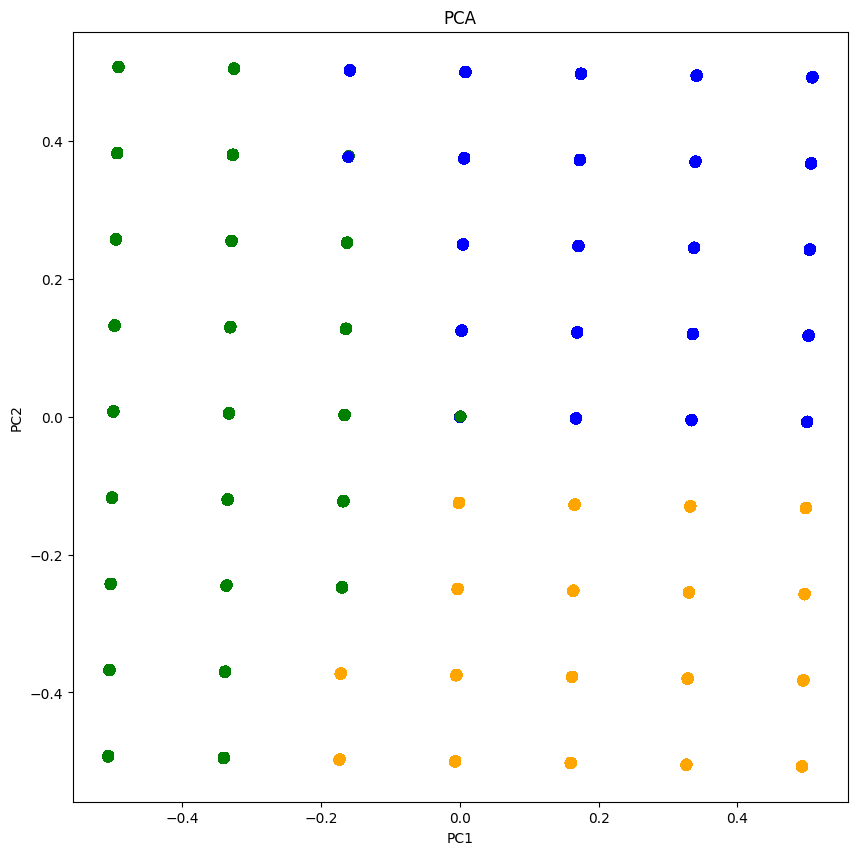

In [18]:
fig = plt.figure(figsize=(10, 10))  # create a figure

ax = fig.add_subplot(111)  # create a 3d subplot
ax.set_xlabel('PC1')  # label the x axis
ax.set_ylabel('PC2')  # label the y axis
ax.set_title('PCA')  # title the plot

color_theme = np.array(['blue', 'green', 'orange', 'red'])  # create a color theme
ax.scatter(x=pca_names_data_df.PC1, 
           y=pca_names_data_df.PC2,
           c=color_theme[pca_names_data_df.KMeans_Clusters], 
           s=50)  # plot the data
plt.show()  # show the plot

Al observar la gráfica de PCA, se puede observar que los datos se encuentran muy dispersos, lo que nos indica que no existe una relación entre los datos. Esto se puede deber a que **los datos no son linealmente separables**.

In [19]:
df.describe()  # get summary of data
pca_names_data_df.describe()  # get summary of data

,PC1,PC2,KMeans_Clusters
count,1.000000e+06,1.000000e+06,1000000.000000
mean,7.580780e-17,8.106404e-18,0.951314
std,3.332445e-01,3.225770e-01,0.784935
min,-5.070796e-01,-5.077533e-01,0.000000
25%,-3.288985e-01,-2.547131e-01,0.000000
50%,5.365280e-04,3.034816e-05,1.000000
75%,3.299843e-01,2.547358e-01,2.000000
max,5.082039e-01,5.077761e-01,2.000000


### Iteraciones para K-Means

Al graficar esta misma gráfica pero utilizando **n** medias [1,5] se puede observar que la función de costo disminuye más rápido cuando se utilizan 3 medias, por lo que se puede decir que el numero correcto de medias es 3.

In [20]:
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(df_norm)
    df[f'KMeans_{k}'] = kmeans.labels_

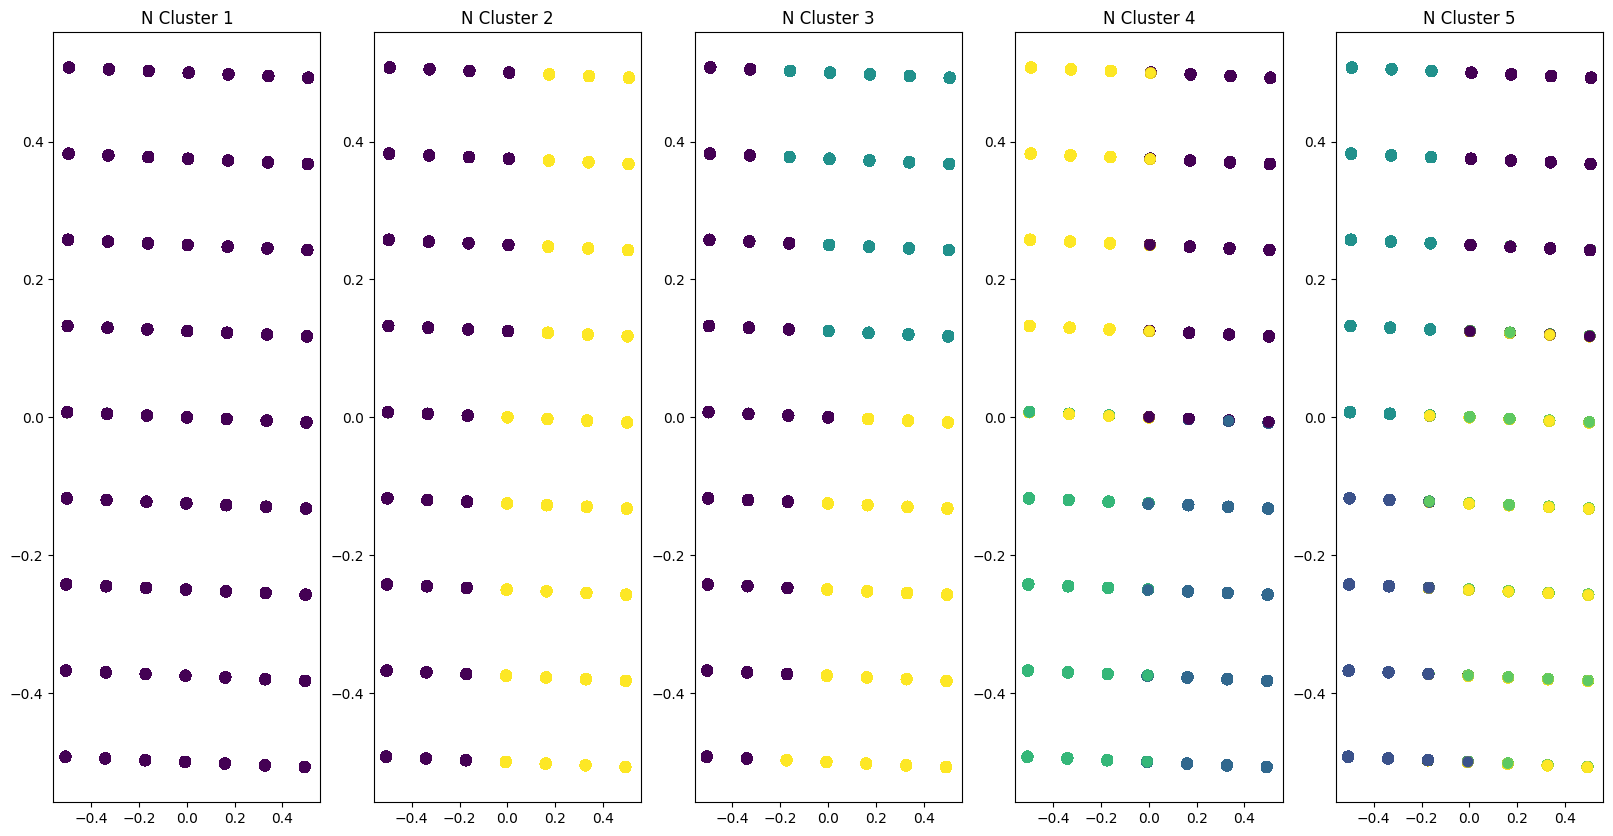

In [21]:
fig, axis = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=pca_names_data_df.PC1, y=pca_names_data_df.PC2, s=50, c=df[f'KMeans_{i}'])

    ax.set_title(f'N Cluster {i}')